In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os

In [2]:
# Load data
path = os.path.join("..", "data", "csvresults", "atari_meta.csv")
df = pd.read_csv(path)
df = df.drop('Unnamed: 0', axis=1).set_index("game")
df = df.drop(["Tennis", "Venture", "MontezumaRevenge"])
df.head()

,reg_loss,reg_mse,reg_mae,reg_val_loss,reg_val_mse,reg_val_mae,hlg_mse,hlg_mae,hlg_loss,hlg_val_mse,hlg_val_mae,hlg_val_loss,y_sd,reg_sd,hlg_sd,kl_mean,kl_sd,hist_sd
game,,,,,,,,,,,,,,,,,,
AirRaid,0.008682,0.008682,0.067155,0.010074,0.010074,0.059409,0.008873,0.068780,3.126328,0.008873,0.068190,3.125896,0.136130,0.00000,0.000000,1.354709,1.336799,0.096615
Alien,0.000827,0.000827,0.008731,0.000716,0.000716,0.008891,0.000843,0.007925,2.243576,0.000709,0.008230,2.240457,0.002764,0.00000,0.000692,0.034985,0.007338,0.040571
Amidar,0.000378,0.000378,0.007455,0.000627,0.000627,0.009036,0.000245,0.004485,2.171497,0.001080,0.012648,2.403203,0.011969,0.01614,0.013054,1.802306,2.315752,0.028396
Assault,0.000014,0.000014,0.000053,0.000021,0.000021,0.000043,0.000014,0.000040,2.125762,0.000021,0.000046,2.124676,0.000000,0.00000,0.000000,0.000075,0.000000,0.024049
Asterix,0.000210,0.000210,0.001097,0.000207,0.000207,0.001159,0.000085,0.000581,2.128017,0.000098,0.000816,2.125485,0.000045,0.00000,0.000057,5.000000,0.000000,0.024059


([<matplotlib.axis.YTick at 0x26e38a76790>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15, '0.15'),
  Text(0, 0.2, '0.20')])

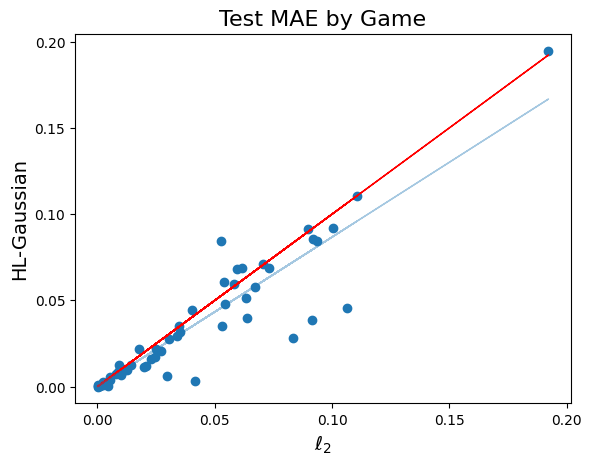

In [37]:
X = df["reg_val_mae"]
Y = df["hlg_val_mae"]
y_pred = np.dot(X.T, Y) / np.dot(X.T, X)
plt.scatter(X, Y)
plt.plot(X, X, color='red', linewidth=1)
plt.plot(X, y_pred * X, color="tab:blue", alpha=0.4, linewidth=1)
plt.title("Test MAE by Game", fontsize=16)
plt.xlabel(r"$\ell_2$", fontsize=14)
plt.ylabel("HL-Gaussian", fontsize=14)
plt.xticks([0, 0.05, 0.1, 0.15, 0.2])
plt.yticks([0, 0.05, 0.1, 0.15, 0.2])


([<matplotlib.axis.YTick at 0x26e38ab78d0>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25')])

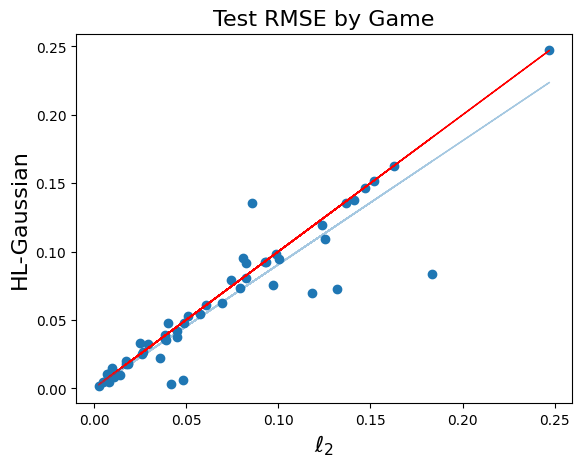

In [36]:
X = np.sqrt(df["reg_val_mse"])
Y = np.sqrt(df["hlg_val_mse"])
y_pred = np.dot(X.T, Y) / np.dot(X.T, X)
plt.scatter(X, Y)
plt.plot(X, X, color='red', linewidth=1)
plt.plot(X, y_pred * X, color="tab:blue", alpha=0.4, linewidth=1)
plt.xlabel(r"$\ell_2$", fontsize=14)
plt.title("Test RMSE by Game", fontsize=16)
plt.ylabel("HL-Gaussian", fontsize=14)
plt.xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
plt.yticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])